In [1]:
import time
import copy as cp

import numpy as np
from numba import jit, njit
PI = np.pi

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  
plt.rcParams['image.cmap']='cool'  ## set a global cmap: 'cool' ,   'twilight_shifted', 'hsv', 'jet'
cmap = 'cool'
alpha = 0.9


## Partial differential equations - wave-type equations

Scheme: 
1. Discretize the spatial dimention: $u_n=u(x_n,t)$  (for example $x_n=nh$) 

2. write a system of $N$ second order (or $2N$ first order) time differential equations:
$$\partial_{tt}u_n=D_{nm}u_m-F_n$$


* write a system of $𝑁$ second order equations:

    $$ u_n''\approx \frac{u_{n-1}-2u_n+u_{n+1}}{h^2}$$

    $$D_{n,m} = \delta_{n-1, m}- 2\delta_{n, m} +\delta_{n+1, m}, \qquad n,m = 0,1,2,3,..., N-1$$
    

* write a system of $2 𝑁$ first order equations:

$$ \vec{v}=(u, \partial_x u)$$

$$ \partial_x \vec{v}=(\partial_x u, \partial_{xx} u)$$

$$ u'_n=\frac{u_{n+1}-u_{n-1}}{2h}$$

$$D_{n,m} = ? , \qquad n,m = 0,1,2,3,..., 2N-1$$


3. use some time-stepping method to solve the system for given initial conditions $u(x, 0), \partial_t u(x, 0)$ and boundary conditions, such as $u(0,t)=f(x)$ and $u(L,t)=g(x)$.
* Runge-Kutta method
* simplectic method

4. Important issue: stability.

For explicit methods time step must be adjusted to the highest eigenvalue of $D_{nm}$
(a saw-type function).
$\lambda \approx (dx)^{−2}$




#### to delete!
$$ \left(\begin{array}{cc} 0  \\ u'' \end{array} \right) = \left(\begin{array}{cc} 0 & 0 \\ 0 & 1 \end{array} \right) \cdot \left(\begin{array}{cc} u' \\ u'' \end{array} \right) $$


## sine-Gordon model:

$$ \partial_{tt}u = \partial_{xx}u - \sin(u)$$

1. initial conditions:

* $u(x, 0) = 0 \qquad (position)$

* $\partial_t u(x, 0) =  \left\{\begin{array}{rcl} 1  \qquad for \qquad x = 0 \\ 0  \qquad for \qquad x>0 \end{array} \right. \qquad (velocity)$

2. boundary conditions:

* $u(0, t) = \sin( \omega t) \qquad $

* $u(L, t) = -\sin( \omega t) \qquad $


### Implementation:

1. spatial dimention discretization:

* $ x_n = n\cdot h \qquad n=0,1,2,3,...,N-1$

* $ u_n(t) = u(t, x_n)$



2. discretized initial conditions:

* $u_n(0) = 0 \qquad (position)$

* $\partial_t u_n(0) =  \left\{\begin{array}{rcl} 1  \qquad for \qquad n = 0 \\ 0  \qquad for \qquad n>0 \end{array} \right. \qquad (velocity)$




3. discretized boundary conditions:

* $u_0(t) = \sin( \omega t) \qquad $

* $u_{N-1}(t) = -\sin( \omega t) \qquad $






4. write a system of $𝑁$ second order equations:

$$ u_n''\approx \frac{u_{n-1}-2u_n+u_{n+1}}{h^2}$$

$$D_{n,m} = \delta_{n-1, m}- 2\delta_{n, m} +\delta_{n+1, m}$$

$$ \partial_{tt}u =  \frac{u_{n-1}-2u_n+u_{n+1}}{h^2} - \sin(u_n) = D_{n,m}u_m - sin(u_n)$$

where:
$$D_{n,m} = \delta_{n-1, m}- 2\delta_{n, m} +\delta_{n+1, m}, \qquad n,m = 0,1,2,3,..., N-1$$



In [10]:
def get_D_second_order(x):
    
    '''
        𝐷𝑛,𝑚 = 𝛿𝑛−1,𝑚 − 2𝛿𝑛,𝑚 + 𝛿𝑛+1,𝑚
        No boundary conditions included
        
    '''
    N = len(x)
    D = np.diagflat( np.ones(N) * (-2))
    
    for i in range(1,N-1):
        D[i][i+1] = 1
        D[i][i-1] = 1
    
    return D

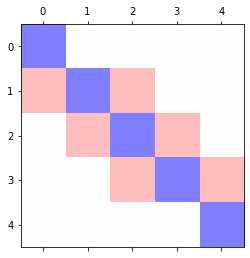

In [11]:
n = 5
xx = np.linspace(0, 4*PI, n)

dx = xx[1] - xx[0]

D = get_D_second_order(xx)

plt.matshow(D, cmap='bwr', vmin=-4, vmax=4) 